# Classify Traffic Signs for Self-Driving Cars using Deep Learning

Such a model can be of great use in the present increasing trend of self-driving cars. A model that is capable to classify traffic road signs to a near 100% would be a ground-breaking discovery for the future of self-driving cars. In this notebook, I try to undertake this classification task. 

#### I perform Deep Learning by building a Convolutional Neural Network (CNN).

1. Load image data
2. Perform image pre-processing. In this problem it involves coverting each image into a grey-scale and then normalizing it. 
3. Built a Convolutional Neural Network Model that is capable to classify the test images correctly, with the help of a training and validation set.
4. To do the classifcation I built a Convulational Neural Network (CNN) is per the LeNet Network Architecture. 
5. Evaluate the classifcation results

More details about the LeNet Network can be found here: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

- The dataset contains 43 different classes of images
- Classes are as listed below: 

    - ( 0, 'Speed limit (20km/h)') ( 1, 'Speed limit (30km/h)')
    - ( 2, 'Speed limit (50km/h)') ( 3, 'Speed limit (60km/h)')
    - ( 4, 'Speed limit (70km/h)') ( 5, 'Speed limit (80km/h)')
    - ( 6, 'End of speed limit (80km/h)') ( 7, 'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, 'No passing for vehicles over 3.5 metric tons')
    - (11, 'Right-of-way at the next intersection') (12, 'Priority road')
    - (13, 'Yield') (14, 'Stop') (15, 'No vehicles')
    - (16, 'Vehicles over 3.5 metric tons prohibited') (17, 'No entry')
    - (18, 'General caution') (19, 'Dangerous curve to the left')
    - (20, 'Dangerous curve to the right') (21, 'Double curve')
    - (22, 'Bumpy road') (23, 'Slippery road')
    - (24, 'Road narrows on the right') (25, 'Road work')
    - (26, 'Traffic signals') (27, 'Pedestrians') (28, 'Children crossing')
    - (29, 'Bicycles crossing') (30, 'Beware of snow')
    - (31, 'Wild animals crossing')
    - (32, 'End of all speed and passing limits') (33, 'Turn right ahead')
    - (34, 'Turn left ahead') (35, b'Ahead only') (36, 'Go straight or right')
    - (37, 'Go straight or left') (38, 'Keep right') (39, 'Keep left')
    - (40, 'Roundabout mandatory') (41, 'End of no passing')
    - (42, 'End of no passing by vehicles over 3.5 metric tons')


### 1. Load Data

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#pickle module implements binary protocols for serializing and de-serializing a Python object structure
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/MyDrive/Colab Notebooks/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

41

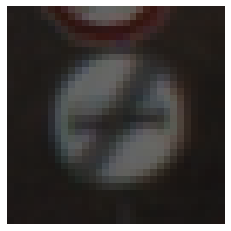

In [7]:
i = 10
plt.imshow(X_train[i])
plt.axis('off')
y_train[i]

In [8]:
X_validation, y_validation = valid['features'], valid['labels']

In [9]:
X_test, y_test = test['features'], test['labels']

### 2. Data Pre-processing (Image Preparation)

In [10]:
#shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
#convert to grayscale image since thats the input required for the LeNet
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)

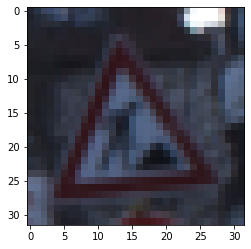

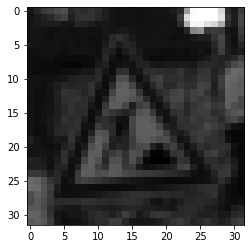

In [12]:
i = 100
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_grey[i].squeeze(), cmap='gray')

In [13]:
X_test_grey  = np.sum(X_test/3, axis=3, keepdims=True)

In [14]:
X_validation_grey  = np.sum(X_validation/3, axis=3, keepdims=True)

In [15]:
#normalize the images to have pixel values between -1 and 1
X_train_norm = (X_train_grey - 128)/128 

In [16]:
X_train_norm.shape #1 means its in greyscale

(34799, 32, 32, 1)

In [17]:
X_test_norm = (X_test_grey - 128)/128

In [18]:
X_validation_norm = (X_validation_grey - 128)/128

# 3. Model Creation and Training

The LeNet Model consists of the following layers: 

- 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [20]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1))) #number of filters is the features depth (number of features)
cnn_model.add(AveragePooling2D()) #this performs the subsampling/downsizing/pooling

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax')) #softmax or sigmoid for output we require a saturated categorial output

In [21]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
history = cnn_model.fit(X_train_norm, y_train, batch_size=500, epochs=50, verbose=1, validation_data = (X_validation_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 19s 258ms/step - loss: 3.1117 - accuracy: 0.1903 - val_loss: 2.5576 - val_accuracy: 0.3431
Epoch 2/50
70/70 [==============================] - 15s 215ms/step - loss: 1.5843 - accuracy: 0.5511 - val_loss: 1.3680 - val_accuracy: 0.6018
Epoch 3/50
70/70 [==============================] - 15s 215ms/step - loss: 0.9078 - accuracy: 0.7382 - val_loss: 1.0654 - val_accuracy: 0.6776
Epoch 4/50
70/70 [==============================] - 15s 214ms/step - loss: 0.6486 - accuracy: 0.8186 - val_loss: 0.8294 - val_accuracy: 0.7429
Epoch 5/50
70/70 [==============================] - 15s 215ms/step - loss: 0.5051 - accuracy: 0.8625 - val_loss: 0.7633 - val_accuracy: 0.7844
Epoch 6/50
70/70 [==============================] - 15s 214ms/step - loss: 0.4217 - accuracy: 0.8851 - val_loss: 0.6936 - val_accuracy: 0.8048
Epoch 7/50
70/70 [==============================] - 17s 243ms/step - loss: 0.3565 - accuracy: 0.9072 - val_loss: 0.6598 - val_accuracy: 0.8147

# 4. Model Evaluation

In [23]:
score = cnn_model.evaluate(X_test_norm, y_test, verbose=0)
print('Test Accuracy: ',score[1])

Test Accuracy:  0.8630245327949524


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
epochs = range(len(accuracy))

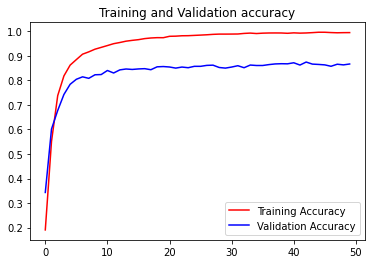

In [27]:
plt.plot(epochs, accuracy, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

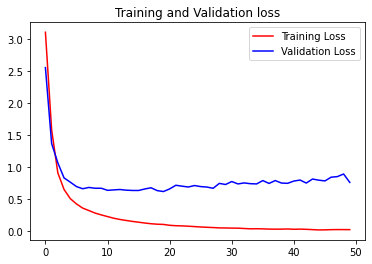

In [28]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [29]:
#get the predictions for the test data
predictions = cnn_model.predict(X_test_norm)

In [30]:
predict_classes = np.argmax(predictions,axis=1)

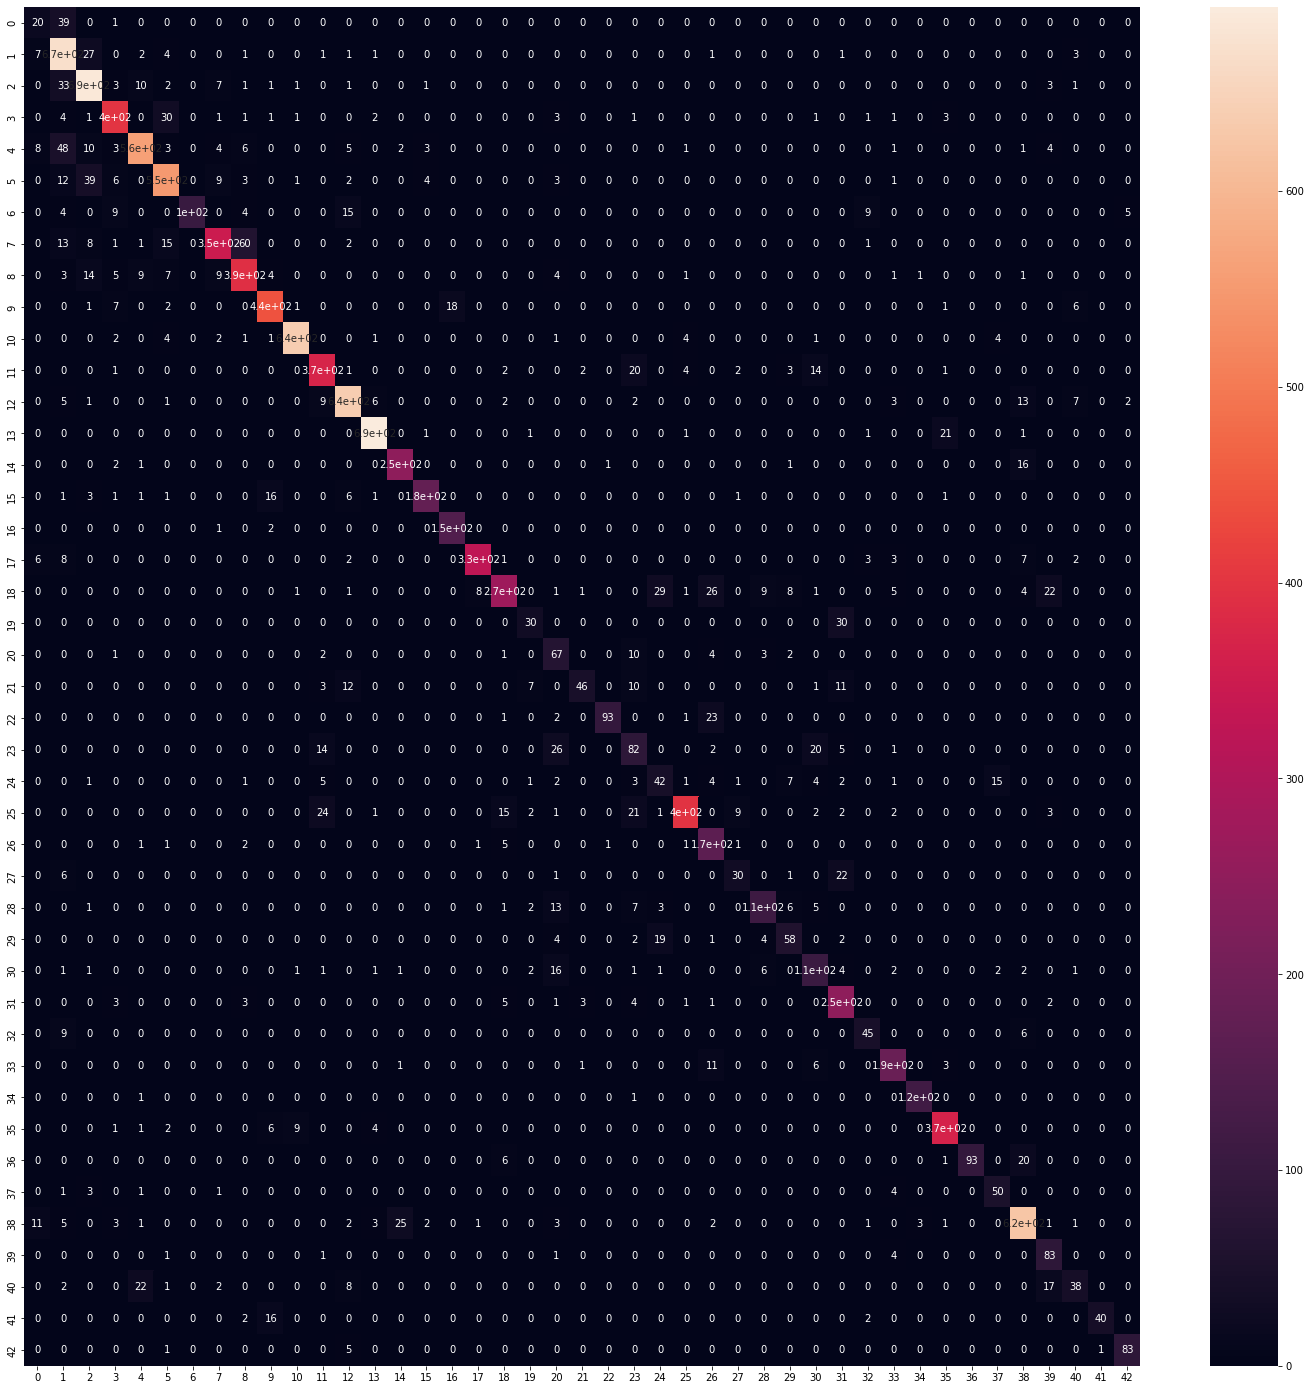

In [31]:
#plot the confusion matrix for better understanding
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

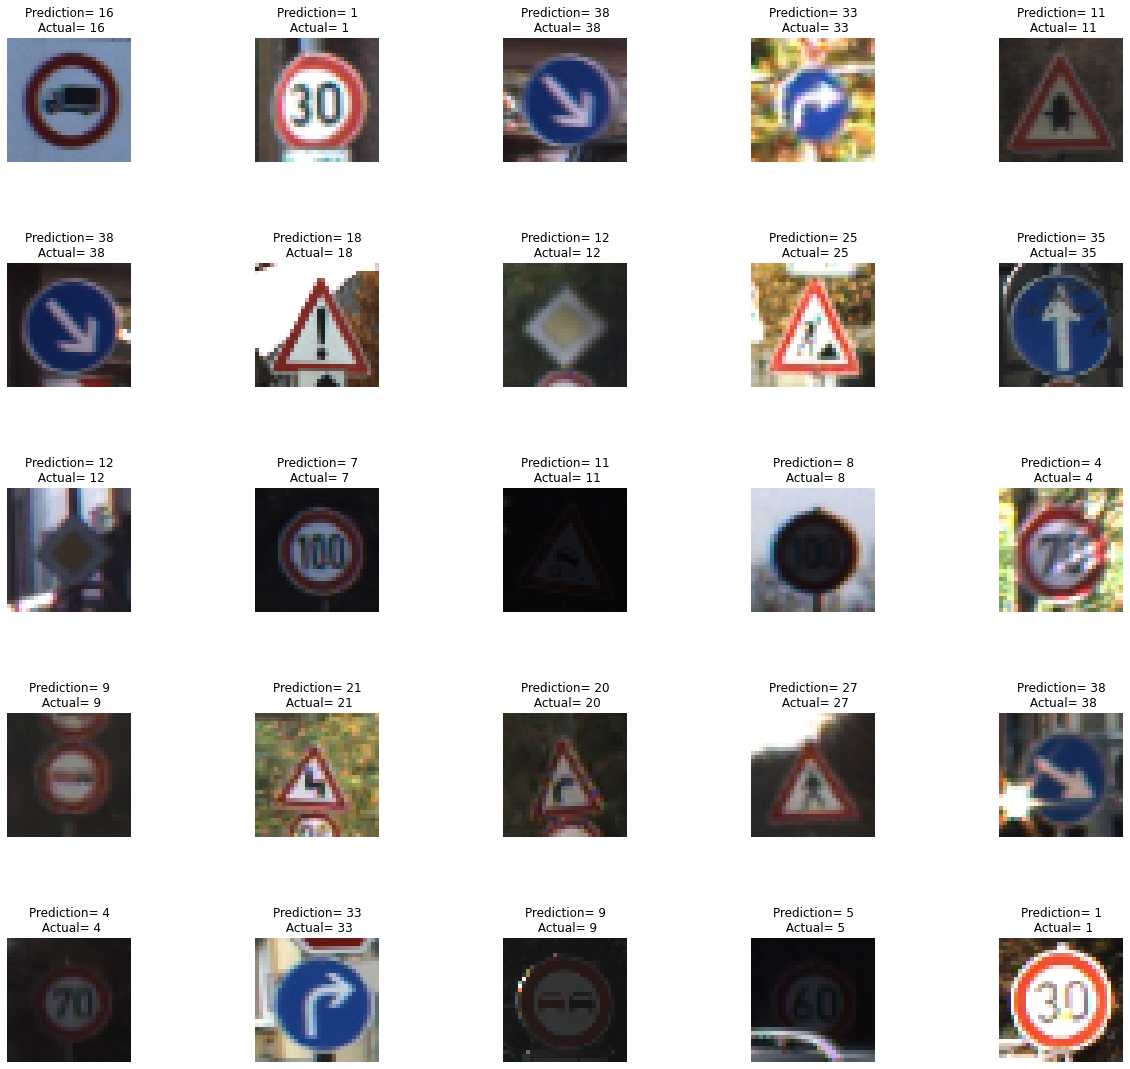

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction= {}\n Actual= {}".format(predict_classes[i], predict_classes[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)